In [268]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
file = 'WitSampPlot.xlsx'
xl = pd.ExcelFile(file)
print((xl.sheet_names))



[u'Sheet1']


In [266]:
df = xl.parse('Sheet1')
groups = df.groupby('Comment')

In [267]:
df.columns

Index([u'X', u'Y', u'Z', u'A0', u'B0', u'LITH1', u'STRAT_MJ', u'WEATH1',
       u'SAMPLEID', u'TCU_PCT', u'LENGTH', u'NEW SAMPLEID', u'Comment',
       u'BV Assay', u'Seq', u'Cu', u'Cu%', u'S', u'S%', u'Ratio'],
      dtype='object')

In [269]:
df1 = df.loc[(df["Comment"]=="Whole") | (df["Comment"]=="Broken core")]

In [42]:
df1.head()

,X,Y,Z,A0,B0,LITH1,STRAT_MJ,WEATH1,SAMPLEID,TCU_PCT,LENGTH,NEW SAMPLEID,Comment,BV Assay,Seq,Cu,Cu%,S,S%,Ratio
0,297797.39,8794009.48,1301.72,270.00,90.00,SDT,Ki1.1.1,MW,DD212810,0.039,1,DD203137,Broken core,DD203137,2.0,368.0,0.0368,100.0,0.010,0.943590
1,301602.08,8794356.71,1064.09,205.38,84.13,SDT,Ki1.1.1,FR,DD212931,1.140,1,DD203138,Whole,DD203138,3.0,10900.0,1.0900,4200.0,0.420,0.956140
4,301396.97,8794298.16,1067.80,228.16,88.83,SDT,Ki1.1.1,FR,DD224651,1.570,1,DD203140,Whole,DD203140,6.0,15600.0,1.5600,5200.0,0.520,0.993631
5,302203.99,8794294.65,990.51,191.36,89.09,SDT,Ki1.1.1,FR,DD225166,1.430,1,DD203141,Whole,DD203141,7.0,13700.0,1.3700,4250.0,0.425,0.958042
6,301998.68,8794887.94,1074.99,192.93,85.34,SSL,Ki1.1.1,FR,DD225274,8.660,1,DD203143,Broken core,DD203143,9.0,105000.0,10.5000,26400.0,2.640,1.212471


In [270]:
df1 = df1.rename(columns={'Comment':'Sample Type'})

In [271]:
df1.head()

,X,Y,Z,A0,B0,LITH1,STRAT_MJ,WEATH1,SAMPLEID,TCU_PCT,LENGTH,NEW SAMPLEID,Sample Type,BV Assay,Seq,Cu,Cu%,S,S%,Ratio
0,297797.39,8794009.48,1301.72,270.00,90.00,SDT,Ki1.1.1,MW,DD212810,0.039,1,DD203137,Broken core,DD203137,2.0,368.0,0.0368,100.0,0.010,0.943590
1,301602.08,8794356.71,1064.09,205.38,84.13,SDT,Ki1.1.1,FR,DD212931,1.140,1,DD203138,Whole,DD203138,3.0,10900.0,1.0900,4200.0,0.420,0.956140
4,301396.97,8794298.16,1067.80,228.16,88.83,SDT,Ki1.1.1,FR,DD224651,1.570,1,DD203140,Whole,DD203140,6.0,15600.0,1.5600,5200.0,0.520,0.993631
5,302203.99,8794294.65,990.51,191.36,89.09,SDT,Ki1.1.1,FR,DD225166,1.430,1,DD203141,Whole,DD203141,7.0,13700.0,1.3700,4250.0,0.425,0.958042
6,301998.68,8794887.94,1074.99,192.93,85.34,SSL,Ki1.1.1,FR,DD225274,8.660,1,DD203143,Broken core,DD203143,9.0,105000.0,10.5000,26400.0,2.640,1.212471


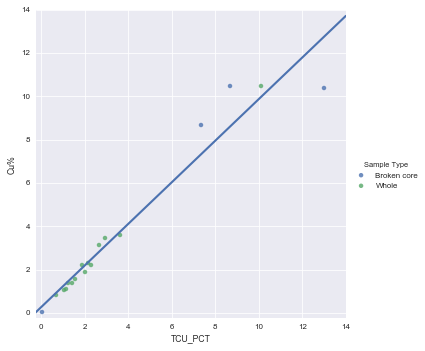

In [273]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig = plt.figure(figsize=(20,20))






# lm= sns.lmplot(x="TCU_PCT", y="Cu%", hue="Sample Type", data=df1, ci = False, fit_reg=False)
# sns.regplot(x='TCU_PCT', y='Cu%', data=df1, scatter=False, ax=g.axes[0,0])

lm= sns.lmplot(x="TCU_PCT", y="Cu%", hue="Sample Type", data=df1, ci = None, fit_reg=False)
sns.regplot(x='TCU_PCT', y='Cu%', data=df1, ci = None, scatter=False, ax=lm.axes[0,0])





sns.plt.ylim(-0.25,14)
sns.plt.xlim(-0.25,14)




lm.savefig("duplicates.pdf")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9880.
Date:                Thu, 16 Mar 2017   Prob (F-statistic):          3.35e-100
Time:                        15:54:52   Log-Likelihood:                 214.33
No. Observations:                 100   AIC:                            -424.7
Df Residuals:                      98   BIC:                            -419.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0504      0.006      8.794      0.0

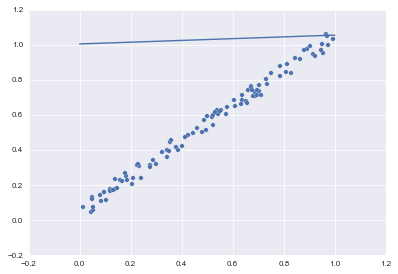

In [255]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100)
Y = X + np.random.rand(100)*0.1

results = sm.OLS(Y,sm.add_constant(X)).fit()

print results.summary()

plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

plt.show()